<a href="https://colab.research.google.com/github/Koks-creator/PpeDetector/blob/main/YOLOv5_TutorialWithGoogleDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>


<br>
  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


# 1. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results to `runs/detect`. Example inference sources are:

```shell
python detect.py --source 0  # webcam
                          img.jpg  # image
                          vid.mp4  # video
                          screen  # screenshot
                          path/  # directory
                         'path/*.jpg'  # glob
                         'https://youtu.be/Zgi9g1ksQHc'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
```

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/areczki.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-253-g63555c8 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/areczki.png: 448x640 2 helmets, 2 persons, 2 vests, 90.0ms
Speed: 0.6ms pre-process, 90.0ms inference, 940.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12


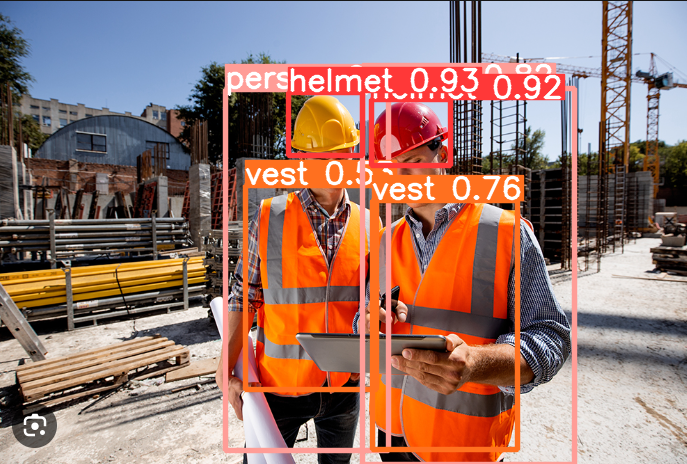

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.25 --source '/content/areczki.png'
display.Image(filename='runs/detect/exp12/areczki.png', width=600)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img align="left" src="https://user-images.githubusercontent.com/26833433/127574988-6a558aa1-d268-44b9-bf6b-62d4c605cc72.jpg" width="600">

# 2. Validate
Validate a model's accuracy on the [COCO](https://cocodataset.org/#home) dataset's `val` or `test` splits. Models are downloaded automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases). To show results by class use the `--verbose` flag.

In [ ]:
# Download COCO val
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d ../datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:12<00:00, 66.6MB/s]


In [ ]:
# Validate YOLOv5s on COCO val
!python val.py --weights yolov5s.pt --data coco.yaml --img 640 --half

val: data=/content/yolov5/data/coco.yaml, weights=['yolov5s.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-136-g71244ae Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
val: Scanning /content/datasets/coco/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100% 5000/5000 [00:02<00:00, 2024.59it/s]
val: New cache created: /content/datasets/coco/val2017.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 157/157 [01:25<00:00,  1.84it/s]
                   all       5000      36335      0.671      0.519      0.566      0.371
Speed: 0.1ms pre-process, 3.1ms inference, 2.3ms NMS per image at shape (32,

# 3. Train

<p align=""><a href="https://bit.ly/ultralytics_hub"><img width="1000" src="https://github.com/ultralytics/assets/raw/main/im/integrations-loop.png"/></a></p>
Close the active learning loop by sampling images from your inference conditions with the `roboflow` pip package
<br><br>

Train a YOLOv5s model on the [COCO128](https://www.kaggle.com/ultralytics/coco128) dataset with `--data coco128.yaml`, starting from pretrained `--weights yolov5s.pt`, or from randomly initialized `--weights '' --cfg yolov5s.yaml`.

- **Pretrained [Models](https://github.com/ultralytics/yolov5/tree/master/models)** are downloaded
automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases)
- **[Datasets](https://github.com/ultralytics/yolov5/tree/master/data)** available for autodownload include: [COCO](https://github.com/ultralytics/yolov5/blob/master/data/coco.yaml), [COCO128](https://github.com/ultralytics/yolov5/blob/master/data/coco128.yaml), [VOC](https://github.com/ultralytics/yolov5/blob/master/data/VOC.yaml), [Argoverse](https://github.com/ultralytics/yolov5/blob/master/data/Argoverse.yaml), [VisDrone](https://github.com/ultralytics/yolov5/blob/master/data/VisDrone.yaml), [GlobalWheat](https://github.com/ultralytics/yolov5/blob/master/data/GlobalWheat2020.yaml), [xView](https://github.com/ultralytics/yolov5/blob/master/data/xView.yaml), [Objects365](https://github.com/ultralytics/yolov5/blob/master/data/Objects365.yaml), [SKU-110K](https://github.com/ultralytics/yolov5/blob/master/data/SKU-110K.yaml).
- **Training Results** are saved to `runs/train/` with incrementing run directories, i.e. `runs/train/exp2`, `runs/train/exp3` etc.
<br>

A **Mosaic Dataloader** is used for training which combines 4 images into 1 mosaic.

## Label a dataset on Roboflow (optional)

[Roboflow](https://roboflow.com/?ref=ultralytics) enables you to easily **organize, label, and prepare** a high quality dataset with your own custom data. Roboflow also makes it easy to establish an active learning pipeline, collaborate with your team on dataset improvement, and integrate directly into your model building workflow with the `roboflow` pip package.

In [ ]:
#@title Select YOLOv5 🚀 logger {run: 'auto'}
logger = 'Comet' #@param ['Comet', 'ClearML', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'ClearML':
  %pip install -q clearml
  import clearml; clearml.browser_login()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir runs/train

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'1_poprawa excel.xlsx'
'1 wojna.gdoc'
 2b_kosztorys_3.gsheet
 3i1-03-Aniela-Dulska.gdoc
'3i1-03 Lektury XX-lecia.gdoc'
 3i1_03-SSH.gdoc
 3i1-03-telnet.gdoc
 4i1_3.gdoc
 about_api.gdoc
 Alezakupy.gsheet
'ang 2 48.gdoc'
'ang3 49.gdoc'
'ang5 34.gdoc'
 ang.gdoc
 Angielski.gdoc
'ang zadania.gdoc'
 apache-3i1-03.gdoc
'Arkusz kalkulacyjny bez tytułu (1).gsheet'
'Arkusz kalkulacyjny bez tytułu (2).gsheet'
'Arkusz kalkulacyjny bez tytułu.gsheet'
 arp-3.gdoc
'artysta i sztuka w ferdydurk.gdoc'
 BaziaBoza
 BeachTenis.gsheet
'Biografia Brunona Schulza.gdoc'
 bloki_3.gdoc
'Bohaterowie granicy zofii nalkowskiej, granica moralna, spoleczna i poznawcza - interpretacja tytulu.gdoc'
'Bohaterowie Sklepow cynamonowych.gdoc'
'Bohatterowie ferdydurke. Anachroniczna instytucja szkoly.gdoc'
 Borowski.gdoc
'cechy tworczosci wislawy szymborskiej.gdoc'
 certyfikacja_3.gdoc
'Charakterstyka Marlowa.gdoc'
 CLI_3.gdoc
'Colab Notebooks'
 cppXDDD
'czyim glosem. ferdy1. Ndurke.gdoc'
'Demokrac

In [ ]:
!unzip /mydrive/yolov5/train_data.zip -d /content

Archive:  /mydrive/yolov5/train_data.zip
   creating: /content/train_data/images/
   creating: /content/train_data/images/train/
  inflating: /content/train_data/images/train/helmets_0.png  
  inflating: /content/train_data/images/train/helmets_1.jpg  
  inflating: /content/train_data/images/train/helmets_10.jpg  
  inflating: /content/train_data/images/train/helmets_100.jpg  
  inflating: /content/train_data/images/train/helmets_101.jpg  
 extracting: /content/train_data/images/train/helmets_102.jpg  
  inflating: /content/train_data/images/train/helmets_103.jpg  
  inflating: /content/train_data/images/train/helmets_104.jpg  
  inflating: /content/train_data/images/train/helmets_105.jpg  
  inflating: /content/train_data/images/train/helmets_106.jpg  
  inflating: /content/train_data/images/train/helmets_107.jpg  
  inflating: /content/train_data/images/train/helmets_108.jpg  
  inflating: /content/train_data/images/train/helmets_109.jpg  
  inflating: /content/train_data/images/trai

In [ ]:
!cp /mydrive/yolov5/custom_data.yaml /content/yolov5/data

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data custom_data.yaml --weights yolov5s.pt --cache

2023-12-20 20:33:25.176865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 20:33:25.176939: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 20:33:25.178427: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, projec

# 4. Visualize

## Comet Logging and Visualization 🌟 NEW

[Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab) is now fully integrated with YOLOv5. Track and visualize model metrics in real time, save your hyperparameters, datasets, and model checkpoints, and visualize your model predictions with [Comet Custom Panels](https://www.comet.com/docs/v2/guides/comet-dashboard/code-panels/about-panels/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab)! Comet makes sure you never lose track of your work and makes it easy to share results and collaborate across teams of all sizes!

Getting started is easy:
```shell
pip install comet_ml  # 1. install
export COMET_API_KEY=<Your API Key>  # 2. paste API key
python train.py --img 640 --epochs 3 --data coco128.yaml --weights yolov5s.pt  # 3. train
```
To learn more about all of the supported Comet features for this integration, check out the [Comet Tutorial](https://docs.ultralytics.com/yolov5/tutorials/comet_logging_integration). If you'd like to learn more about Comet, head over to our [documentation](https://www.comet.com/docs/v2/?utm_source=yolov5&utm_medium=partner&utm_campaign=partner_yolov5_2022&utm_content=yolov5_colab). Get started by trying out the Comet Colab Notebook:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1RG0WOQyxlDlo5Km8GogJpIEJlg_5lyYO?usp=sharing)

<a href="https://bit.ly/yolov5-readme-comet2">
<img alt="Comet Dashboard" src="https://user-images.githubusercontent.com/26833433/202851203-164e94e1-2238-46dd-91f8-de020e9d6b41.png" width="1280"/></a>

## ClearML Logging and Automation 🌟 NEW

[ClearML](https://cutt.ly/yolov5-notebook-clearml) is completely integrated into YOLOv5 to track your experimentation, manage dataset versions and even remotely execute training runs. To enable ClearML (check cells above):

- `pip install clearml`
- run `clearml-init` to connect to a ClearML server (**deploy your own [open-source server](https://github.com/allegroai/clearml-server)**, or use our [free hosted server](https://cutt.ly/yolov5-notebook-clearml))

You'll get all the great expected features from an experiment manager: live updates, model upload, experiment comparison etc. but ClearML also tracks uncommitted changes and installed packages for example. Thanks to that ClearML Tasks (which is what we call experiments) are also reproducible on different machines! With only 1 extra line, we can schedule a YOLOv5 training task on a queue to be executed by any number of ClearML Agents (workers).

You can use ClearML Data to version your dataset and then pass it to YOLOv5 simply using its unique ID. This will help you keep track of your data without adding extra hassle. Explore the [ClearML Tutorial](https://docs.ultralytics.com/yolov5/tutorials/clearml_logging_integration) for details!

<a href="https://cutt.ly/yolov5-notebook-clearml">
<img alt="ClearML Experiment Management UI" src="https://github.com/thepycoder/clearml_screenshots/raw/main/scalars.jpg" width="1280"/></a>

## Local Logging

Training results are automatically logged with [Tensorboard](https://www.tensorflow.org/tensorboard) and [CSV](https://github.com/ultralytics/yolov5/pull/4148) loggers to `runs/train`, with a new experiment directory created for each new training as `runs/train/exp2`, `runs/train/exp3`, etc.

This directory contains train and val statistics, mosaics, labels, predictions and augmentated mosaics, as well as metrics and charts including precision-recall (PR) curves and confusion matrices.

<img alt="Local logging results" src="https://user-images.githubusercontent.com/26833433/183222430-e1abd1b7-782c-4cde-b04d-ad52926bf818.jpg" width="1280"/>


# Environments

YOLOv5 may be run in any of the following up-to-date verified environments (with all dependencies including [CUDA](https://developer.nvidia.com/cuda)/[CUDNN](https://developer.nvidia.com/cudnn), [Python](https://www.python.org/) and [PyTorch](https://pytorch.org/) preinstalled):

- **Notebooks** with free GPU: <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a> <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> <a href="https://www.kaggle.com/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
- **Google Cloud** Deep Learning VM. See [GCP Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/google_cloud_quickstart_tutorial/)
- **Amazon** Deep Learning AMI. See [AWS Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/aws_quickstart_tutorial/)
- **Docker Image**. See [Docker Quickstart Guide](https://docs.ultralytics.com/yolov5/environments/docker_image_quickstart_tutorial/) <a href="https://hub.docker.com/r/ultralytics/yolov5"><img src="https://img.shields.io/docker/pulls/ultralytics/yolov5?logo=docker" alt="Docker Pulls"></a>


# Status

![YOLOv5 CI](https://github.com/ultralytics/yolov5/actions/workflows/ci-testing.yml/badge.svg)

If this badge is green, all [YOLOv5 GitHub Actions](https://github.com/ultralytics/yolov5/actions) Continuous Integration (CI) tests are currently passing. CI tests verify correct operation of YOLOv5 training ([train.py](https://github.com/ultralytics/yolov5/blob/master/train.py)), testing ([val.py](https://github.com/ultralytics/yolov5/blob/master/val.py)), inference ([detect.py](https://github.com/ultralytics/yolov5/blob/master/detect.py)) and export ([export.py](https://github.com/ultralytics/yolov5/blob/master/export.py)) on macOS, Windows, and Ubuntu every 24 hours and on every commit.


# Appendix

Additional content below.

In [ ]:
# YOLOv5 PyTorch HUB Inference (DetectionModels only)
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', force_reload=True)  # yolov5n - yolov5x6 or custom
im = 'https://ultralytics.com/images/zidane.jpg'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

In [ ]:
from dataclasses import dataclass
from typing import Union, Tuple
import pandas as pd
import torch
import numpy as np
import cv2


@dataclass
class Yolov5Detector:
    model_path: str
    confidence_threshold: float = 0.2

    def __post_init__(self) -> None:
        self.model = torch.hub.load("ultralytics/yolov5", "custom", fr"{self.model_path}", force_reload=True)
        self.model.conf = self.confidence_threshold

    def detect(self, image: Union[str, np.array]) -> Tuple[np.array, pd.DataFrame]:
        results = self.model([image])

        return np.squeeze(results.render()), results.pandas().xyxy[0]


if __name__ == '__main__':
    yolov5 = Yolov5Detector(model_path="/content/yolov5/runs/train/exp/weights/last.pt")

    img = cv2.imread(rf"/content/train_data/images/train/zztrafficLights729 (3).png")
    img_copy = img.copy()
    results_draw, results_df = yolov5.detect(img)
    h, w, _ = img.shape
    for row in results_df.iterrows():
        detection = row[1]
        print(detection)
        bbox = (int(detection.xmin), int(detection.ymin), int(detection.xmax), int(detection.ymax))
        conf = detection.confidence
        class_name = detection['name']
        print(class_name)

        cv2.putText(img_copy, f"{class_name}: {round(conf, 2)}", (bbox[0], bbox[1]-5), cv2.FONT_HERSHEY_PLAIN, 1.5, (255, 0, 225), 2)
        cv2.rectangle(img_copy, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 225), 2)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-196-gacdf73b Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


xmin            186.573273
ymin             12.470256
xmax            354.994049
ymax            377.846039
confidence        0.823723
class                    2
name          yellow light
Name: 0, dtype: object
yellow light
xmin            136.593033
ymin            253.879776
xmax            188.805817
ymax            344.356079
confidence        0.616303
class                    2
name          yellow light
Name: 1, dtype: object
yellow light
